In [1]:
!git fetch && git pull

Already up to date.


In [2]:
!pip3 install /Engineering/Milestone3/VirtualMachine/Orchestrator/sail

Processing /Engineering/Milestone3/VirtualMachine/Orchestrator/sail
  Created wheel for sail: filename=sail-0.1-py3-none-any.whl size=2567650 sha256=b0c07885c49ad2e4d73ada4d768b8c2a6cf320b6f59177ab7c499dcf107cbb95
  Stored in directory: /tmp/pip-ephem-wheel-cache-fd9d712g/wheels/b0/60/b6/609c9a342cddf0049ae606db2c0c6669680b2612a0e7553b31
Successfully built sail
  Attempting uninstall: sail
    Found existing installation: sail 0.1
    Uninstalling sail-0.1:
      Successfully uninstalled sail-0.1


In [3]:
from sail.core import VMSetup, registersafeobj,login,connect,pushsafeobj,querydata,get_fns
from sail.data import RemoteDataFrame, Utils
from sail.algo import fdxgb
import time
start_time = time.time()

In [4]:
import json, requests
soPath = "/Engineering/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
contractdict = [{"DigitalContractGuid":"{3867E174-D3D7-4F09-862D-09B02E30167B}"}, {"DigitalContractGuid":"{358729A6-126B-4651-82E2-BE3F1CAA2709}"}]
backendIP = "52.150.26.47"

registersafeobj(soPath)
print("[P]safe objects registered")

[P]safe objects registered


In [5]:
eosb = login("r@r.r", "SailPassword@123", 6200, backendIP)
print("[P]login success")
print(eosb)

[P]login success
5iEQAhtloSPPq5HWbQBXJ6U/hqVwXi0s5gOCLAtrYpgU7QDB9MbhUgcxSFCxoqILSKi01A0DAAB9hZNtu5T71EhyQT8A3X5P1csmxZn/aOufoqaM3mm5y2pQnNvWvCKjiZaSQUDPd4ZU1TS2I8t4wPIM/o3OImFPFiOdY+rA+Oo+EK2K17194RnNCElTn7z/rvODv78bgW629Afm+4jUTbf6yGO5ilxWmXuDXq69N7YRGqnQyt1/k0y9wZ+1pnmrHzElm31DFj0DHwPQVKFcID1CKs8GgeXyO+ZhXnlVLKyei5vC4XH5VZUMB0jp11OA3biJbs4Zk9wQQsx6t3g+TNJWH2EHoHNUF9Jfw/PNjc1btgs5xNXwqy5RjiZpmPgXudrUPWk/tHvLGEdGT4KF9bp7R2SHqA2w16Vw4ExT04Dlgru/2UC3Fn0SKpkE7kPyyR5fV4XJz7/XGD/yOBf7oy0TBMjPv/n2lpR60C/xmHEMuehpKKV5mcUkXK+8IRwe+WHpMsf/lks6dCYc6BwopRMeaqredua67E1l2OahShAc9tqeKSVzV9z3FGwptwppub/bsS9Q7Fc1bnYK9z6iG5L6jk7PwdsSj2/EjqGPDzZaRoi7B+TaWCy51YS5Hceo8fq656xaPz331+A3pL+pf8HKyxFwnd3CcbigMKpEvLV3R7XAxW9vkRpStAX42taygAJOB36qgYjOEMsd4XyXnlT0DkMBgg1Q8Pj8JQ6pFmJpDIS25DjRKi75ZGw4Zjkkjex2nwi95NmdmewQZmHHU0KpjY8piw31dF4lCmwcIb9EwphI+5g6XsXmKnY2Ell5coDmmXjOOLl6WiThnI4ElRBXcMfTBS+wptEQS1ffrCDkJqekcJ5I6O880Ak3NlTZvgZF4fNm88qUzK/6wsfU8Q+LwHjB8h91KxykwoEQf0I9c3rFXX3NQRD+ug0dTQ6ZxzGrjrBQCWFeLZh/ySFFVNm

In [6]:
url = "https://"+backendIP+":6200/SAIL/VirtualMachineManager/GetRunningVMsIpAdresses?Eosb="+eosb

payloads = []
for item in contractdict:
    temp = json.dumps(item)
    payloads.append(temp)

headers = {
    'Content-Type': 'application/json'
}

ips = []
for payload in payloads:
    print(payload)
    response = requests.request("GET", url, headers=headers, data=payload, verify=False)
    response = response.json()
    print(response)
    for key in response['VirtualMachines']:
        ips.append(response['VirtualMachines'][key])
        print(ips)

{"DigitalContractGuid": "{3867E174-D3D7-4F09-862D-09B02E30167B}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'Status': 200.0, 'VirtualMachines': {'26A65B7F49EB4929AAD66F0849B536B7': '20.120.113.249'}}
['20.120.113.249']
{"DigitalContractGuid": "{358729A6-126B-4651-82E2-BE3F1CAA2709}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'Status': 200.0, 'VirtualMachines': {'A46C19F627914B77A40894F3AB5AF9CF': '20.124.38.78'}}
['20.120.113.249', '20.124.38.78']


In [7]:
vmids = []
for ip in ips:
    vmid = connect(ip, 3500)
    vmids.append(vmid)
print("[P]virtual machine connection to ip: {0} success".format(ip), flush=True)
    
fns = get_fns()
for vm in vmids:
    for key in fns:
        pushsafeobj(vm, fns[key])
print("[P]safe object pushed to virtual machines" , flush=True)

table = []
for vm in vmids:
    tableid = querydata(vm)
    table.append(tableid)
print("[P]obtain table ids", flush=True)

[P]virtual machine connection to ip: 20.124.38.78 success
[P]safe object pushed to virtual machines
[P]obtain table ids


In [8]:
table

[{'Telco Split 1': '5944BC32A62E1140A18D45C83ADE6743'},
 {'Telco Split 2': '536DE55B26CDF64ABBB96D4792486A65'}]

In [9]:
mid_time = time.time()


u1 = Utils(vmids[0], fns)
u2 = Utils(vmids[1], fns)
df1 = u1.read_csv(table[0]['Telco Split 1'])
df2 = u2.read_csv(table[1]['Telco Split 2'])
dfs = [df1, df2]

print(time.time() - mid_time)

8.010059356689453


In [10]:
dfs

['{3E52E6B6-9D28-4DC3-A270-DF36EC5AD736}.5C37473C6D3443F49C03CAF0D746B997',
 '{73723940-40BC-407B-AF62-4FA34E4397E5}.5C37473C6D3443F49C03CAF0D746B997']

In [11]:
n=2
data1 = RemoteDataFrame(vmids[0], df1, fns)
data2 = RemoteDataFrame(vmids[1], df2, fns)
data = [data1, data2]

In [12]:
data

In [13]:
dtypes = data1.dtypes
type_dict = dict(dtypes)
cate_labels = [key for key in type_dict if type_dict[key] in ['bool', 'object']]
cate_labels.remove('phone number')

In [14]:
cols = []
cols.append(data1.columns)
cols.append(data2.columns)

In [15]:
y=[]
X=[]
n=2
for i in range(n):
    if 'phone number' in cols[i]:
        data[i].data_id = data[i].drop('phone number', axis = 1)
    data[i].data_id = data[i].label_encode(cate_labels)
    y.append(data[i]['churn'])
    X.append(data[i].drop('churn', axis = 1))

In [16]:
cols[0]

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [17]:
dim = len(cols[0])-2
fdxgbmod = fdxgb(vmids, params={'max_depth': 8 }, feature_num = dim)

In [18]:
y_new = []
for item in y:
    y_new.append(item.data_id)
y=y_new
y

['{3ABACFD6-00F1-4798-9963-C78CDBA73711}.048E16B349F8450694B1B30E0E49E6CE',
 '{2D371BD3-FCC0-4E72-B563-22FE38063070}.048E16B349F8450694B1B30E0E49E6CE']

In [19]:
model_params = {
# "colsample_bylevel": ,
# "colsample_bytree": ,
# "gamma": ,
"learning_rate": 0.1285296847082715,
# "max_delta_step": ,
"max_depth": 9,
"n_estimators": 50,
# "reg_alpha": ,
# "reg_lambda": ,
"subsample": 0.8,
"scale_pos_weight": 3
}

fdxgbmod.params = model_params

In [20]:
mid_time = time.time()

model = fdxgbmod.fit(X,y)

print(time.time() - mid_time)

all_hashes has len 71
all_hashes has len 71
[15:01:05] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
307.5935490131378


In [21]:
# mid_time = time.time()
# results =  fdxgbmod.aucpr_score(model, X, y)
# print(time.time() - mid_time)

In [23]:
import numpy as np

mid_time = time.time()
fdxgbmod.model = model

y_pred = fdxgbmod.predict(X)

pred_prob1 = 1/(1+ np.exp(-y_pred[0]))
print("Time Taken: "+str(time.time() - mid_time)+" seconds")

Time Taken: 2.0285582542419434 seconds


In [24]:
mid_time = time.time()
u1 = Utils(vmids[0], fns)
precision1, recall1, thresholds1 = u1.precision_recall_curve(y[0], pred_prob1)
print("Time Taken: "+str(time.time() - mid_time)+" seconds")

Time Taken: 2.005328893661499 seconds


In [25]:
mid_time = time.time()
y1_df = RemoteDataFrame(vmids[0], y[0], fns)
baseline = y1_df.mean()
print("Time Taken: "+str(time.time() - mid_time)+" seconds")

Time Taken: 2.00429368019104 seconds


In [26]:
baseline

0.12672672672672672

In [27]:
recall1

array([1.        , 0.99526066, 0.99526066, ..., 0.00947867, 0.00473934,
       0.        ])

In [28]:
import numpy as np

np.unique(pred_prob1)

array([0.00203344, 0.00253894, 0.00304257, ..., 0.9796316 , 0.97967213,
       0.9802476 ], dtype=float32)

Text(0.5, 1.0, 'PR Curve')

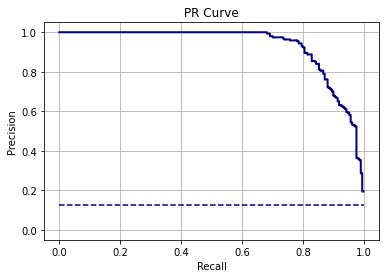

In [29]:
import matplotlib.pyplot as plt

size=None
if size is not None:
    plt.figure(figsize=(size, size))
    plt.axis('equal')
plt.plot(recall1, precision1, lw=2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
plt.hlines(baseline, 0, 1, linestyles="dashed", colors="darkblue", label=f"Baseline (area = {baseline})")
plt.grid()
plt.title("PR Curve")

In [31]:
pred_prob2 = 1/(1+ np.exp(-y_pred[1]))

In [32]:
mid_time = time.time()
u2 = Utils(vmids[1], fns)
precision2, recall2, thresholds2 = u2.precision_recall_curve(y[1], pred_prob2)
print("Time Taken: "+str(time.time() - mid_time)+" seconds")

Time Taken: 2.0049314498901367 seconds


In [33]:
mid_time = time.time()
y2_df = RemoteDataFrame(vmids[1], y[1], fns)
baseline = y2_df.mean()
print("Time Taken: "+str(time.time() - mid_time)+" seconds")

Time Taken: 2.004340410232544 seconds


In [34]:
baseline

0.16326530612244897

In [35]:
recall2

array([1.        , 0.99632353, 0.99632353, ..., 0.00735294, 0.00367647,
       0.        ])

In [36]:
import numpy as np

np.unique(pred_prob2)

array([0.00218924, 0.00258455, 0.0029875 , ..., 0.9857231 , 0.98666996,
       0.986989  ], dtype=float32)

Text(0.5, 1.0, 'PR Curve')

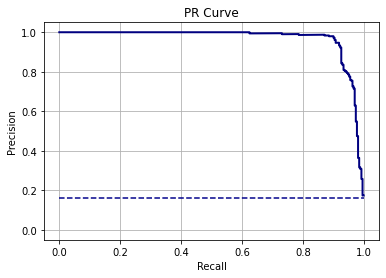

In [37]:
import matplotlib.pyplot as plt

size=None
if size is not None:
    plt.figure(figsize=(size, size))
    plt.axis('equal')
plt.plot(recall2, precision2, lw=2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
plt.hlines(baseline, 0, 1, linestyles="dashed", colors="darkblue", label=f"Baseline (area = {baseline})")
plt.grid()
plt.title("PR Curve")